<a href="https://colab.research.google.com/github/POS-Cross/Bravo-EDA/blob/main/Bravo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bravo Supermartk Exploratory Data Analysis notebook

---

## Business Opportunity:

---
This project aims to develop a cross-selling recommander system that helps Bravo employees to offer a special cross-selling for their customers. The recommender system should predict the customers’ interests and recommend for them related products to buy as a package using Cross-selling marketing technique. Such products generally belong to different product categories but will be complementary. For example,  **“Eggs 30 Pcs”** with  **“Abu Eta Noodles 200G”**, or **“Al - Junaidi Milk Milk Long Life 1L”**.

**Cross-selling product recommendation API** would help in:
* Increases customer retention.
* Increases average order value and lifetime value.
* Maintaining market share.
* Add a competitive advantage.
* Attract more customers. 


---


## Business Objectives
* **BO-1:**  Enhancing the competitive position, maintaining and increasing the market share.
* **BO-2:** Classify customers per selling quantities and work on 20/80 role.
* **BO-3:** This system will decrease 75% of expiry date quantities.
* **BO-4:** This system will increase the efficiency of cross-selling offers. 
* **BO-5:** Reducing lost applications with no more than 0.001%  following the initial release.
* **BO-6:** Increase Bravo’s market share.
* **BO-7:** Increase customer loyalty and satisfaction.

# **Table Of Contents**

---



>[Bravo Supermartk Exploratory Data Analysis notebook](#scrollTo=YQYmSCxzyUtz)

>>[Business Opportunity:](#scrollTo=YQYmSCxzyUtz)

>>[Business Objectives](#scrollTo=YQYmSCxzyUtz)

>[Table Of Contents](#scrollTo=d7nHlOdgdaOe)

>>[Loading the Dataset](#scrollTo=igPijalv0jxQ)

>>>[Mounting Google Drive locally](#scrollTo=5oKaekCDLYRV)

>>>[Load the required libraries](#scrollTo=A6Yk2l4e0B48)

>>>[Fields Description](#scrollTo=AcaPBsy_5Dd6)

>>[Data Transformation and Cleansing](#scrollTo=M7O9W4db0o4-)

>>>[Split the DateTime coulmn](#scrollTo=UXW4h1xbc4EZ)

>>[Explore Data (First Look)](#scrollTo=2Ni__z_y_CzP)

>>>[Q1: What are the frequency and total net values for all trasactions?](#scrollTo=gnL6JWSw15Wc)

>>>[Q2: What are the frequency and net sum of returned trasactions?](#scrollTo=TrhdM4gG1L4i)

>>[Statistical Question:](#scrollTo=ousjVXQIK0av)

>>>[Q3: How many customer Groups are there?](#scrollTo=XXDrkQrZK7zD)

>>>[Q4: What are the number of trasactions per top 20 registerd customers in the whole period?](#scrollTo=EcHHzzGG7A4I)

>>>[Q5: What are the percentage of trasactions per Customer Group](#scrollTo=3wWO_MxA84QN)

>>>[Q6: What are the percentage of Invoices per Customer Group?](#scrollTo=7x13856Q9OIR)

>>>[Q7: What are the monthly purchases for customers?](#scrollTo=TwzxCMZti59H)

>>>[Q8: What is the frequency of transactions per month?](#scrollTo=73cJ2pp--Kea)

>>>[Q9: What are the frequency of transactions by day?](#scrollTo=iNlAEBLfB7h_)

>>>[Q10: What are the sales by day?](#scrollTo=8kMwulfTCzya)

>>>[Q11: What are the top 20 best-selling products?](#scrollTo=Ogi35GF7EWC8)

>>>[Q12: What are the min/max of orders recived from top 50 customers?](#scrollTo=fR7yJGbCJbIo)

>>>[Q13: What are the number of products bought per department?](#scrollTo=9I5XCgxu5u5B)

>>>[Q14: What are number of products bought per department per group?](#scrollTo=2fAFcCt0OLfz)

>>>[Q14: Can we find correlations between departments based on the common products that appear at the same transactions?](#scrollTo=LnLzdY2QTdPw)

>>>[Q15: what products are bought together (in the same transaction)](#scrollTo=3WD9SU-Gd_ZA)



**Instructions**:  
All cells (blocks) below are code cells and should be edited with extreme care. Lines starting with # are comments (not executed).  
The next two cells should not be changed.  
**Important**: Click the folder icon to the left to show the session (temporary) files, then click the G drive icon (top right in the left pane) and select Connect to Google Drive. You should see a folder named drive.   
**Adjust parameters**: The easiest way is to edit the required parameters (4 items below) and run the whole script from the Runtime menu (run all).   
**Note**: It is good practice to turn off the session (Runtime -> Manage Sessions -> Terminate) after you copy the file. The system will timeout after somtime of inactivity. There is no need to change compute type.


## Loading the Dataset

### Mounting Google Drive locally

### 1. Load the required libraries

In [4]:

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d khaledanaqwa/bravodata

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 86% 97.0M/112M [00:01<00:00, 53.6MB/s]
100% 112M/112M [00:01<00:00, 61.3MB/s] 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#f2a553', '#d96548', '#c14953','#86c1b2','#98e2c6','#f3c969']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

CSV = '/content/bravodata.zip'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


### **Fields Description**
---
The `Query.csv` file contains data for **3481792** transactions on Bravo supermarket. Each row represents one trasaction (item bought) for the period **2019/9/1** to **2019/12/31**
. The columns describe different attributes about the transaction such Item Name, Customer Number, Barcode, Bill No, etc. 

**Notes:**


*   **cBrutoValue** = **GrossRetailPrice** * **Quantity**
*   **DiscountValue** is linked with **bHasPromotions** with **OfferNo**, example if **DiscountValue** = 0 then, **bHasPromotions** = 0 and **OfferNo**=0. 
if **DiscountValue**=2 then, **bHasPromotions**= -1, and **OfferNo** <>0 


---

**Discrption of the list of available variables :**

* Columns
* dTicketInternalKey :Invoice Internal Number
* BravoNo : Branch (Bravo1, Bravo2…. etc)
* Invoice_Date : Invoice Date
* cBrutoValue : Total Price before discount
* POS_NO : Point Of Sale Number (POS1, POS2…..etc)
* BillNo : Invoice Number for the Customer
* dItemInternalKey : Item Internal Number
* Barcode: Barcode
* ItemName: Name
* GrossRetailPrice: Retail Price Before Discount
* Quantity: Qunatity
* TotalBeforeDisc :Total Price Before Discount
* DiscValue: Discount
* NetSales_IncVAT: Retail price Before Discount
* Total_Net_InvoiceIncVAT: Total invoice include VAT
* bHasPromotions: Is the item included into promotion or not 
* OfferNo: Offer No 
* dVendorId: Provider Number
* DeptNo: Item Numbe
* CashierNoL Chasier Number
* CustomerGroup: The customer group  
* CustomerNo: Customer Number


In [6]:
df_items=pd.read_csv(CSV)
df_items

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260.0,104,804,0,0
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540.0,107,804,0,0
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470.0,112,804,0,0
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520.0,112,804,0,0
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024.0,108,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590.0,108,847,1,628959


## Data Transformation and Cleansing





* **Check for null values**

In [7]:
df_items.isnull().any()

dTicketInternalKey         False
BravoNo                    False
Invoice_Date               False
cBrutoValue                False
POS_NO                     False
BillNo                     False
dItemInternalKey           False
Barcode                    False
ItemName                   False
GrossRetailPrice            True
Quantity                   False
TotalBeforeDisc            False
DiscValue                  False
NetSales_IncVAT            False
Total_Net_InvoiceIncVAT    False
bHasPromotions             False
OfferNo                    False
dVendorId                  False
DeptNo                     False
CashierNo                  False
CustomerGroup              False
CustomerNo                 False
dtype: bool

Only The field named **GrossRetailPrice** has **Null** values, let us explore the records containing null values.

In [8]:
df_items[df_items.GrossRetailPrice.isnull()]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
1106395,31172985,2,08/10/2019 0:00:00,4.99,1,86055,28355,9700192832519,Rejected,NaN,1.0,4.99,0.0,4.99,16.0,0,0,0.0,0,736,0,0
1921583,31375957,1,05/11/2019 0:00:00,19.99,7,35540,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,81.0,0,0,0.0,0,839,0,0
1923338,31376207,1,05/11/2019 0:00:00,19.99,7,35674,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,289.5,0,0,0.0,0,839,1,401844


The GrossRetailPrice has **NAN** values where **ItemName = Rejected**, the item is returned and not included in the Bill, so we will drop it from the data frame becuase it is not valid. The total number of rows (transactions) after dropping the **NAN** values is **3,481,789**

In [9]:
df_clean= df_items.dropna()
df_clean.shape[0]

3481789

### Split the DateTime coulmn


---
In this step, we are going to split the DateTime column into three columns [day, month, year] and add them to the data frame in order to achieve atomic clean data.



In [10]:
def splitDay(value):
  return int(value.split()[0].split("/")[0])
def splitMonth(value):
  return int(value.split()[0].split("/")[1])
def splitYear(value):
  return int(value.split()[0].split("/")[2])   

df_clean =df_clean.convert_dtypes()
df_clean['day'] = df_clean.Invoice_Date.map(splitDay)
df_clean['month'] =df_clean.Invoice_Date.map(splitMonth)
df_clean['year'] = df_clean.Invoice_Date.map(splitYear)

df_clean

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260,104,804,0,0,1,9,2019
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540,107,804,0,0,1,9,2019
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470,112,804,0,0,1,9,2019
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520,112,804,0,0,1,9,2019
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024,108,804,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405,112,847,1,628959,14,12,2019
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730,112,847,1,628959,14,12,2019
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590,108,847,1,628959,14,12,2019
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590,108,847,1,628959,14,12,2019


## Explore Data (First Look)
---

### Q1: What are the frequency and total net values for all trasactions?

In [11]:
num = len(df_items.dTicketInternalKey.unique())
sum = df_items.drop_duplicates(['dTicketInternalKey']).NetSales_IncVAT.sum()
print('The count of transactions number for all vlaues = ', num)
print('The sum of transactions values for all vlaues = ', sum)

The count of transactions number for all vlaues =  717993
The sum of transactions values for all vlaues =  10178794.410000004


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481789 entries, 0 to 3481791
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   dTicketInternalKey       Int64  
 1   BravoNo                  Int64  
 2   Invoice_Date             string 
 3   cBrutoValue              float64
 4   POS_NO                   Int64  
 5   BillNo                   Int64  
 6   dItemInternalKey         Int64  
 7   Barcode                  Int64  
 8   ItemName                 string 
 9   GrossRetailPrice         float64
 10  Quantity                 float64
 11  TotalBeforeDisc          float64
 12  DiscValue                float64
 13  NetSales_IncVAT          float64
 14  Total_Net_InvoiceIncVAT  float64
 15  bHasPromotions           Int64  
 16  OfferNo                  Int64  
 17  dVendorId                Int64  
 18  DeptNo                   Int64  
 19  CashierNo                Int64  
 20  CustomerGroup            Int64  
 21  Customer

Now the dataframe **df_clean** contains clean and atomic data.
**`Summary`**: **dtypes: Int64(13), float64(7), int64(3), string(2), memory usage: 733.8 MB**. The total number of cloumns (features) is 
 **25**, and the number of records is **3,481,789**.



From the clean data frame, we will drop unimportant features. Those features are either a repeated data or not useful in the EDA at this stage.

**Descriptive analysis**

In [13]:
df_clean.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
count,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3481789.0
mean,3.132324e+07,3.624966e+00,1.309281e+01,2.594319e+00,4.801253e+04,4.487879e+04,5.119277e+12,1.210402e+01,1.533528e+00,1.309281e+01,1.339488e+00,1.175332e+01,1.751565e+02,-3.101187e-01,4.187299e+03,1.516755e+05,1.074356e+02,5.127829e+02,2.935948e-01,1.258388e+05,1.525688e+01,1.048031e+01,2019.0
std,2.567027e+05,2.748435e+00,1.785420e+01,1.532749e+00,3.086681e+04,2.735733e+04,3.112059e+12,1.474821e+01,2.929979e+00,1.785420e+01,3.694893e+00,1.591552e+01,2.116725e+02,4.625421e-01,6.428605e+03,1.305203e+05,4.943263e+00,3.158856e+02,4.554085e-01,2.085804e+05,8.988825e+00,1.107534e+00,0.0
min,3.086030e+07,1.000000e+00,-1.771000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-7.700000e+02,-1.771000e+03,-5.079000e+01,-1.771000e+03,-9.542000e+02,-1.000000e+00,0.000000e+00,9.990000e+02,1.000000e+02,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,2019.0
25%,3.111291e+07,1.000000e+00,4.000000e+00,1.000000e+00,2.111400e+04,1.437500e+04,3.574660e+12,3.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,3.595000e+01,-1.000000e+00,0.000000e+00,1.016400e+05,1.030000e+02,1.680000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01,2019.0
50%,3.133082e+07,3.000000e+00,9.180000e+00,2.000000e+00,4.211000e+04,5.741600e+04,6.253503e+12,7.000000e+00,1.000000e+00,9.180000e+00,0.000000e+00,8.720000e+00,1.010000e+02,0.000000e+00,0.000000e+00,1.027300e+05,1.080000e+02,6.510000e+02,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+01,2019.0
75%,3.154733e+07,5.000000e+00,1.600000e+01,3.000000e+00,7.951300e+04,6.876300e+04,7.290011e+12,1.500000e+01,1.480000e+00,1.600000e+01,1.330000e+00,1.400000e+01,2.395000e+02,0.000000e+00,1.075100e+04,1.046600e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.133950e+05,2.300000e+01,1.100000e+01,2019.0
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.832400e+04,1.000000e+13,2.500000e+02,6.000000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,5.010600e+05,3.330000e+02,8.500000e+02,1.000000e+00,4.353006e+06,3.100000e+01,1.200000e+01,2019.0


We notice that the minimum value is less than zero for **TotalBeforeDisc,	DiscValue,	Total_Net_InvoiceIncVAT** so, we fetch data from the original data frame (clean) for records with **Quantity < 0**, and we found that there are **6989 rows** that have values less than zero. This leads us to the Question, ***What does Quantity less than zero mean?***

### Q2: What are the frequency and net sum of returned trasactions? 

In [14]:
df_minus = df_clean[(df_clean['Total_Net_InvoiceIncVAT']<0) | (df_clean['TotalBeforeDisc']< 0) | (df_clean['DiscValue'] < 0) | (df_clean['NetSales_IncVAT']<0)]
df_minus= df_minus.drop_duplicates('dTicketInternalKey')
num = df_minus.dTicketInternalKey.count()
sum = df_minus.NetSales_IncVAT.sum()
print('The count of transactions number for minus vlaues = ', num)
print('The sum of transactions values for minus vlaues = ', sum)

The count of transactions number for minus vlaues =  5921
The sum of transactions values for minus vlaues =  -86736.40000000001


In [15]:
df_clean[ df_clean.Quantity < 0]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
109,30860336,1,01/09/2019 0:00:00,-15.00,2,50236,1164,24000104582,Delmonte Sweet Corn 410G,5.0,-3.0,-15.00,0.0,-15.00,-5.00,0,0,106470,105,804,0,0,1,9,2019
587,30860520,1,01/09/2019 0:00:00,-24.00,2,50302,62607,199474,Roastery 24 Nis,24.0,-1.0,-24.00,0.0,-24.00,-24.00,0,0,100460,100,804,0,0,1,9,2019
2352,30861003,1,01/09/2019 0:00:00,-2.50,3,76125,22247,7290004125455,Shemenit 200G,2.5,-1.0,-2.50,0.0,-2.50,1.50,0,0,103260,103,814,0,0,1,9,2019
2356,30861004,1,01/09/2019 0:00:00,-74.00,3,76306,45733,8906076274043,Al Walimeh Arabi Rice 10K,74.0,-1.0,-74.00,0.0,-74.00,-38.00,0,0,102730,105,814,0,0,1,9,2019
2357,30861004,1,01/09/2019 0:00:00,-32.00,3,76306,77593,6281003103057,Mazola Sunflower Oil 3.5L,32.0,-1.0,-32.00,0.0,-32.00,-38.00,0,0,102550,105,814,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476702,31754991,1,14/12/2019 0:00:00,-12.00,3,24466,74427,6253802331115,Dates Diafy 0.5K,12.0,-1.0,-12.00,0.0,-12.00,-6.00,0,0,106670,111,839,0,0,14,12,2019
3476778,31755014,1,14/12/2019 0:00:00,-2.00,3,24354,61929,6251036019625,Mr Chips Crocodilechips 30G,1.0,-2.0,-2.00,0.0,-2.00,-2.00,0,0,101580,112,839,0,0,14,12,2019
3479433,31755648,1,14/12/2019 0:00:00,-18.00,7,45563,58947,8006746001211,Cotton Sticks In Rectangular Box 400,9.0,-1.0,-18.00,0.0,-18.00,-18.00,0,0,102120,109,835,0,0,14,12,2019
3479593,31755661,1,14/12/2019 0:00:00,-22.00,2,1266,77747,7290113319417,Water Bottel Sport 650 Ml Mix,22.0,-1.0,-22.00,0.0,-22.00,39.15,0,0,103290,108,814,1,433005,14,12,2019


**Data Cleaning for zero / minus values** In this stage, we will drop data with values less than zero from the aforementioned fields that contain minus values.


---

There are **1893 rows** with **Total_Net_InvoiceIncVAT = 0**

In [16]:
# # Get names of indexes for which column Total_Net_InvoiceIncVAT has value less than 0
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']<=0) | (df_clean['TotalBeforeDisc']<= 0) | (df_clean['DiscValue'] <= 0) | (df_clean['Quantity']<= 0)].index

# Delete these row indexes from dataFrame
df_clean.drop(indexNames , inplace=True )
df_clean

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.80,-1,13369,103260,104,804,0,0,1,9,2019
10,30860304,1,01/09/2019 0:00:00,11.00,2,50204,68248,6253501790497,Ghadeer Water 12*500M Case,11.0,1.00,11.00,1.00,10.00,12.00,-1,15193,102550,112,804,0,0,1,9,2019
21,30860310,1,01/09/2019 0:00:00,27.00,2,50210,63361,9555127903815,Royal Classic Butter Cookies 908G,27.0,1.00,27.00,2.00,25.00,35.25,-1,13014,102570,112,804,0,0,1,9,2019
31,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56302,72989425,Ben &Jerry Brouns Chocolate 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405,106,804,0,0,1,9,2019
32,30860315,1,01/09/2019 0:00:00,30.00,2,50215,56306,72986455,Ben &Jerry New Yourk Ice Cream 500G,30.0,1.00,30.00,8.00,22.00,99.50,-1,16169,100405,106,804,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.90,-1,15967,100405,112,847,1,628959,14,12,2019
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.90,-1,16124,101730,112,847,1,628959,14,12,2019
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.90,-1,14084,101590,108,847,1,628959,14,12,2019
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.90,-1,15482,101590,108,847,1,628959,14,12,2019


In [17]:
df_clean.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
count,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1078555.0,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1.078555e+06,1078555.0
mean,3.132476e+07,3.978022e+00,1.903882e+01,2.659635e+00,4.766816e+04,4.566870e+04,5.528355e+12,1.581244e+01,1.846532e+00,1.903882e+01,4.319895e+00,1.471892e+01,2.188300e+02,-1.0,1.350295e+04,1.888937e+05,1.082191e+02,4.932042e+02,4.246877e-01,1.881956e+05,1.490840e+01,1.049843e+01,2019.0
std,2.558345e+05,3.064597e+00,2.241419e+01,1.548554e+00,3.081760e+04,2.759164e+04,2.669408e+12,1.676907e+01,2.534437e+00,2.241419e+01,5.531030e+00,1.827649e+01,2.220767e+02,0.0,2.735592e+03,1.636273e+05,3.423016e+00,3.269544e+02,4.942957e-01,2.398554e+05,9.114324e+00,1.103075e+00,0.0
min,3.086030e+07,1.000000e+00,3.800000e-01,1.000000e+00,1.000000e+00,7.100000e+01,2.000000e+00,5.000000e-01,2.000000e-02,3.800000e-01,1.000000e-02,-1.100000e+01,5.000000e-02,-1.0,1.631000e+03,9.990000e+02,1.000000e+02,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,2019.0
25%,3.112540e+07,1.000000e+00,9.000000e+00,2.000000e+00,2.099500e+04,1.399800e+04,4.100290e+12,5.000000e+00,1.000000e+00,9.000000e+00,1.590000e+00,6.780000e+00,6.605000e+01,-1.0,1.266200e+04,1.017300e+05,1.050000e+02,1.080000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+01,2019.0
50%,3.134217e+07,3.000000e+00,1.500000e+01,2.000000e+00,4.097300e+04,5.673300e+04,6.253501e+12,1.100000e+01,1.000000e+00,1.500000e+01,3.000000e+00,1.000000e+01,1.501000e+02,-1.0,1.441700e+04,1.032600e+05,1.090000e+02,6.490000e+02,0.000000e+00,0.000000e+00,1.400000e+01,1.000000e+01,2019.0
75%,3.154958e+07,5.000000e+00,2.100000e+01,3.000000e+00,7.961000e+04,6.964300e+04,7.290011e+12,2.000000e+01,2.000000e+00,2.100000e+01,5.250000e+00,1.600000e+01,2.993000e+02,-1.0,1.545700e+04,1.089700e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.659040e+05,2.300000e+01,1.100000e+01,2019.0
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.829300e+04,9.997870e+12,2.150000e+02,5.400000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,-1.0,1.634600e+04,5.010600e+05,1.120000e+02,8.500000e+02,1.000000e+00,4.353006e+06,3.100000e+01,1.200000e+01,2019.0


In [18]:
df_clean[df_clean.Total_Net_InvoiceIncVAT <.5]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
75686,30876091,2,03/09/2019 0:00:00,16.00,3,44209,74079,8697666002596,Carton Cups 7Oz,4.0,4.0,16.00,6.00,10.00,0.10,-1,14310,104550,108,644,0,0,3,9,2019
1713267,31324903,3,29/10/2019 0:00:00,10.50,1,10251,8980,59290500677,Mcvities Biscuits Hob Nobs 300G,10.5,1.0,10.50,2.50,8.00,0.10,-1,14993,101650,112,651,0,0,29,10,2019
1713268,31324903,3,29/10/2019 0:00:00,12.00,1,10251,10731,5352101243387,Foster Clarks Raspberry 85G,4.0,3.0,12.00,3.00,9.00,0.10,-1,15113,101650,112,651,0,0,29,10,2019
1718612,31325843,5,29/10/2019 0:00:00,12.50,1,90076,9687,80052760,Kinder Bueno T2*30*4,2.5,5.0,12.50,2.50,10.00,0.20,-1,14659,501020,112,175,0,0,29,10,2019
1777345,31346051,1,01/11/2019 0:00:00,30.01,2,80972,10946,5449000129604,Cappy Orange 1.5L,5.0,6.0,30.01,8.00,22.01,0.05,-1,13269,101730,112,830,0,0,1,11,2019
2082623,31409678,2,10/11/2019 0:00:00,23.98,1,8845,59932,7290011402020,Frozen Potato Tnouva 2 K,24.0,1.0,23.98,4.00,19.98,0.20,-1,15780,100950,106,738,0,0,10,11,2019
2611839,31547380,7,30/11/2019 0:00:00,12.00,1,83482,64753,6253506130021,Abu Aita Pasta -00 350G,2.0,6.0,12.00,2.00,10.00,0.40,-1,12842,109840,105,97,0,0,30,11,2019
3115467,31667900,7,18/12/2019 0:00:00,13.79,2,30288,56422,12100,Puck Mozzarella Cheese,46.0,0.3,13.79,2.99,10.80,0.20,-1,14324,100950,104,93,0,0,18,12,2019


## Statistical Question:

---






### Q3: How many customer Groups are there? 




In [19]:
customers_reg_num = len(df_clean[df_clean.CustomerGroup == 1].CustomerNo.unique())
print('Number of customers with Bravo Thank U cards are : ' ,customers_reg_num)

Number of customers with Bravo Thank U cards are :  14883


### Q4: What are the number of trasactions per top 20 registerd customers in the whole period? 

Text(0, 0.5, 'Regestired Customer Number')

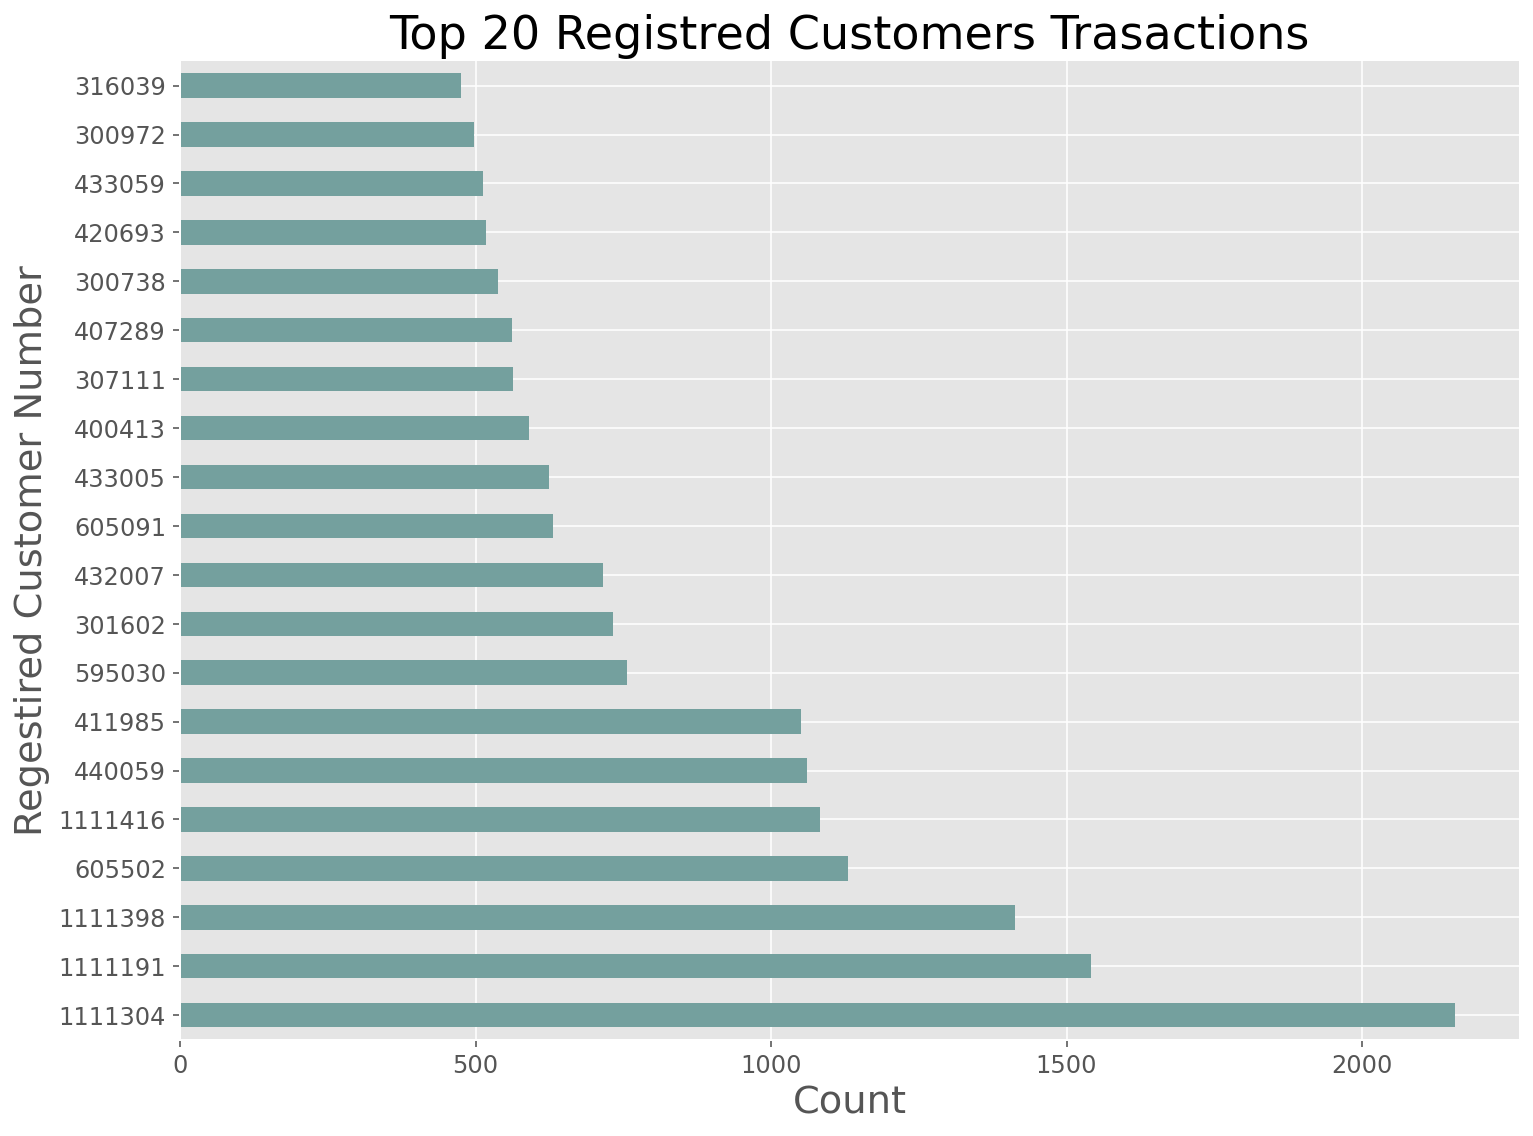

In [20]:
df_group =df_clean[df_clean.CustomerGroup==1].groupby(['CustomerNo'])
ax =df_group['BillNo'].count().nlargest(20).plot.barh(title='Top 20 Registred Customers Trasactions')
ax.set_xlabel('Count')
ax.set_ylabel('Regestired Customer Number')

The figure above shows the number of transactions per customer, we can see that the top 20 customers transactions range from (500  - 2000 )

###Q5: What are the percentage of trasactions per Customer Group

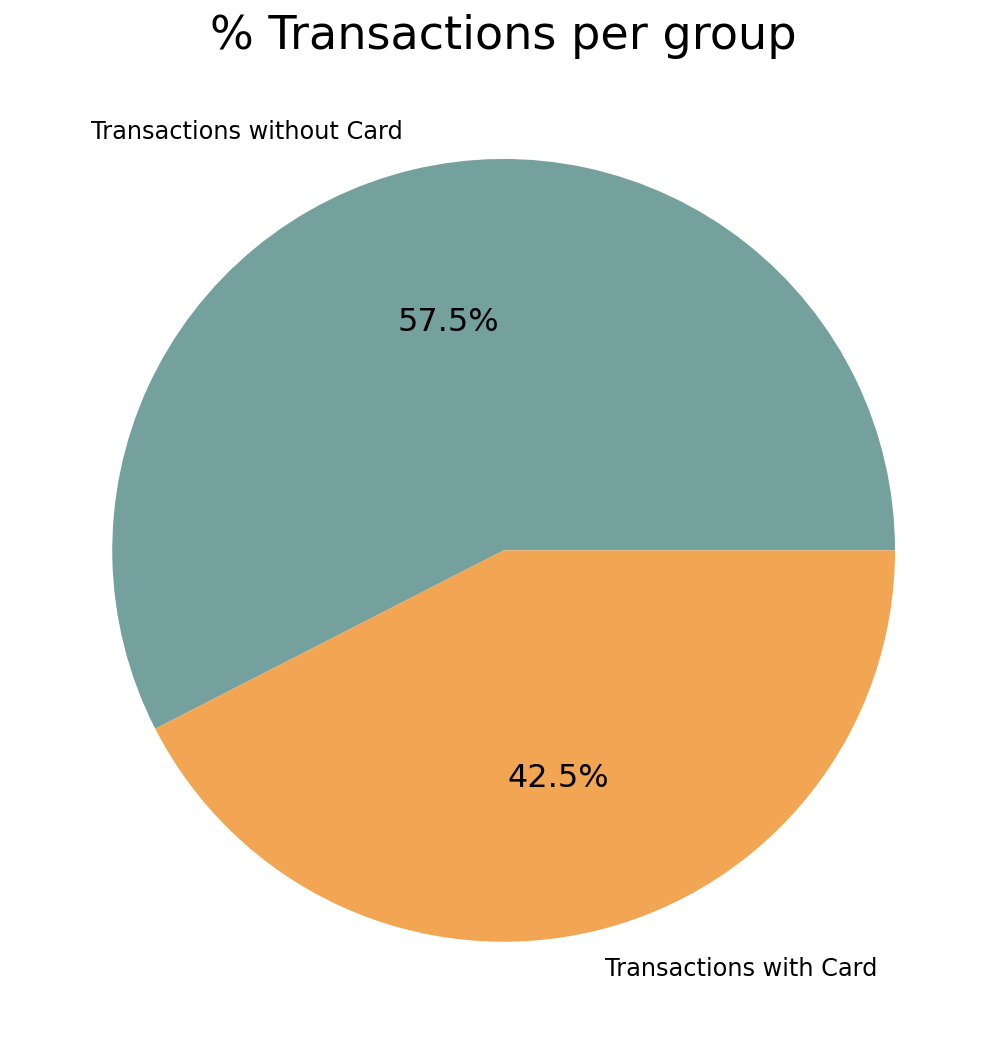

In [21]:
ax = df_clean.CustomerGroup.value_counts().plot.pie(labels=['Transactions without Card','Transactions with Card'],autopct='%.1f%%')
ax.set_title('% Transactions per group')
ax.set_ylabel('');

Customers' transactions without cards are nearly 57.5% from all transactions, while customers with card transactions are about 42,5%.

### Q6: What are the percentage of Invoices per Customer Group?

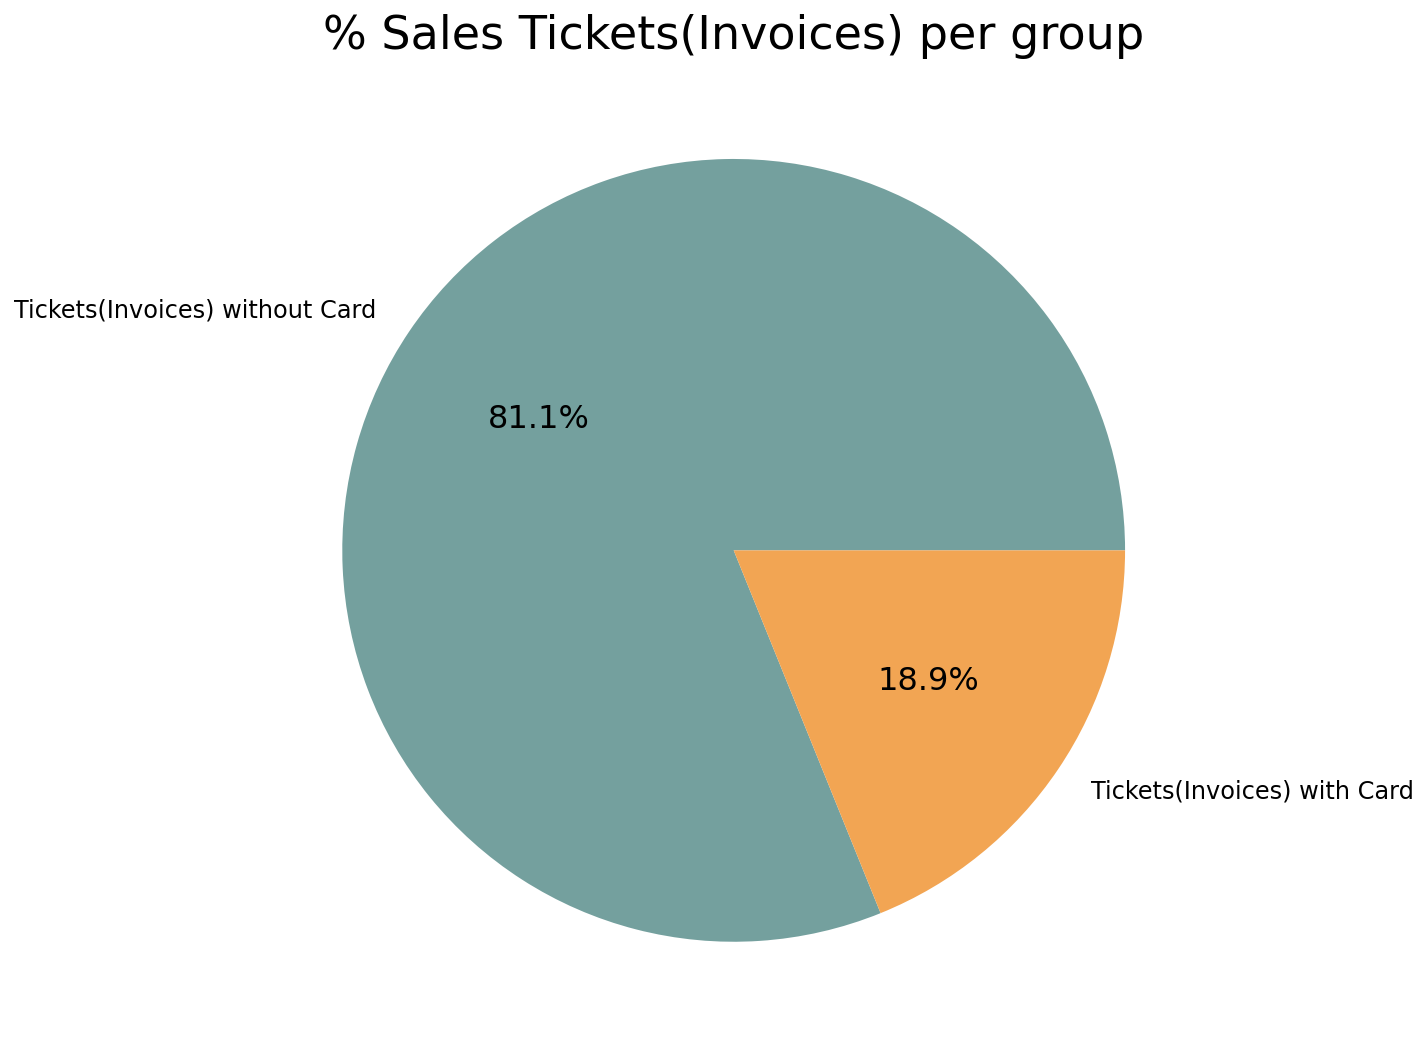

In [22]:
uniqueTickets =df_clean.drop_duplicates("dTicketInternalKey")
ax =uniqueTickets.CustomerGroup.value_counts().plot.pie(labels=['Tickets(Invoices) without Card','Tickets(Invoices) with Card'],autopct='%.1f%%')
ax.set_title('% Sales Tickets(Invoices) per group')
ax.set_ylabel('');

Tickets don't have Bravo Thank you card **(CustomerGroup=zero)** have a percentage with ***81.1%*** while the Tickets have Bravo Card **(CustomerGroup=one)** are only about ***18.9%***.



### **Q7: What are the monthly purchases for customers?**


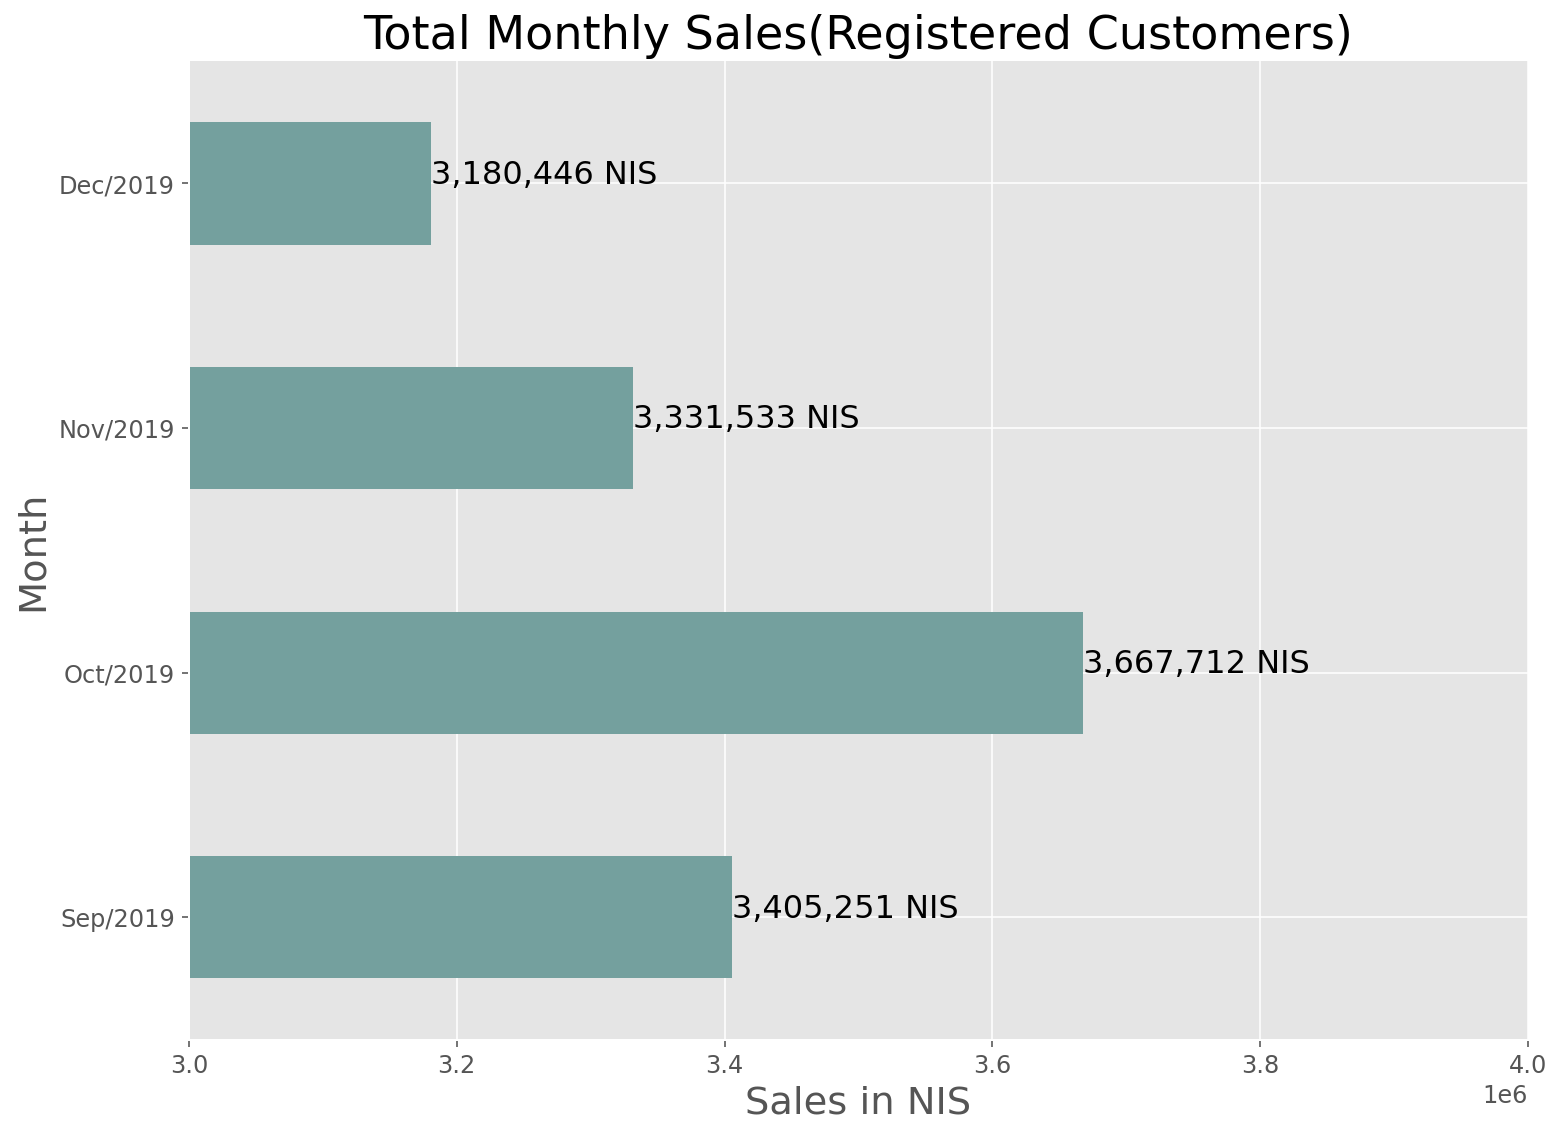

In [23]:
df_customers= df_clean[df_clean.CustomerGroup ==1] # only customers who have Bravo Card.
# f, ax = plt.subplots(1,1, figsize=(7, 4));

df_monthly_purchases=uniqueTickets[uniqueTickets.CustomerGroup ==1].groupby(['month'])
df_monthly_purchasesSum = df_monthly_purchases['Total_Net_InvoiceIncVAT'].sum()
ax = df_monthly_purchasesSum.plot.barh()
ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Month');
ax.set_xlabel('Sales in NIS');
ax.set_title('Total Monthly Sales(Registered Customers)')
ax.set_xlim(3000000,4000000)

for index,data in enumerate(df_monthly_purchasesSum):
    ax.text(y=index , x =data , s="{:0,.0f} NIS".format(round(data)))

From the Figure, we can see that the highest monthly purchases are in October **3,667,712 NIS**.

### Q8: What is the frequency of transactions per month?
 

In [24]:
df_cust= df_clean[df_clean.CustomerGroup ==1].drop_duplicates('dTicketInternalKey') # only customers who have Bravo Card.

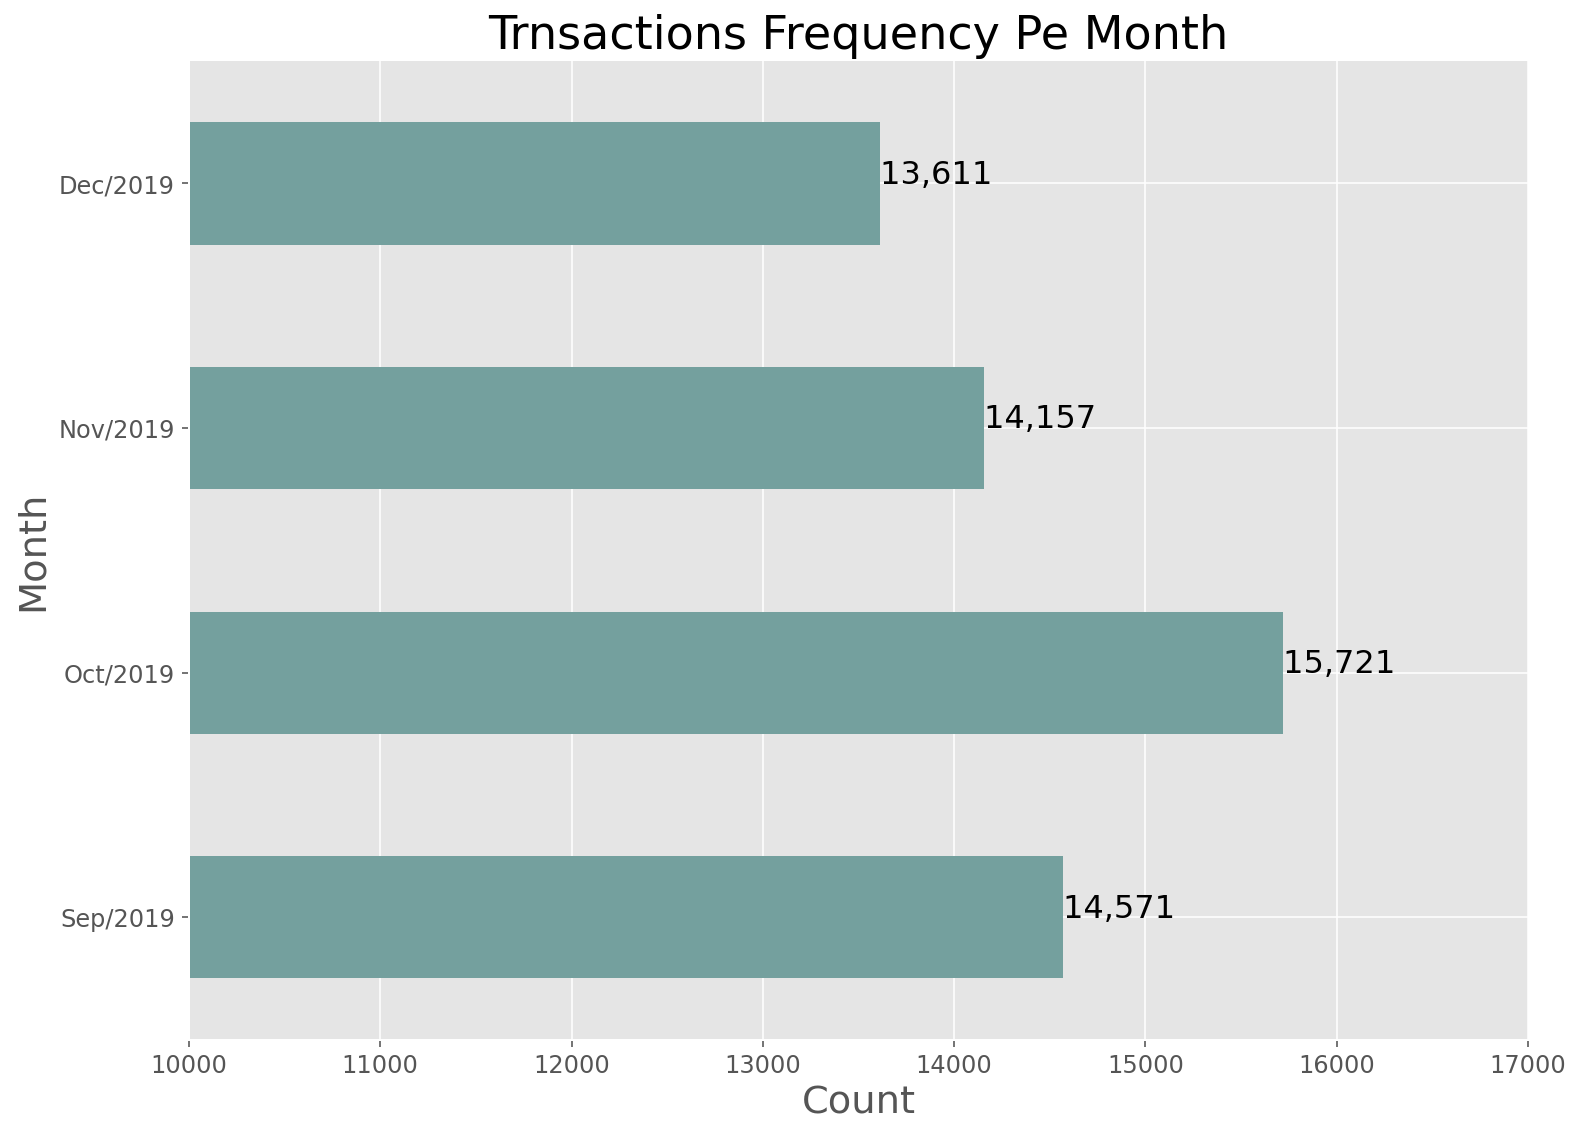

In [25]:

# f, ax = plt.subplots(1,1, figsize=(7, 4));

df_monthly_transactions=df_cust.groupby('month')
df_monthly_transactions_count = df_monthly_transactions.dTicketInternalKey.count()
ax = df_monthly_transactions_count.plot.barh()
ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Month');
ax.set_xlabel('Count');
ax.set_title('Trnsactions Frequency Pe Month')
ax.set_xlim(10000,17000)

for index,data in enumerate(df_monthly_transactions_count):
    ax.text(y=index , x =data , s="{:0,.0f} ".format(data))

October has the highest transaction among all months with **124,094** transaction recorded.

### Q9: What are the frequency of transactions by day?

---



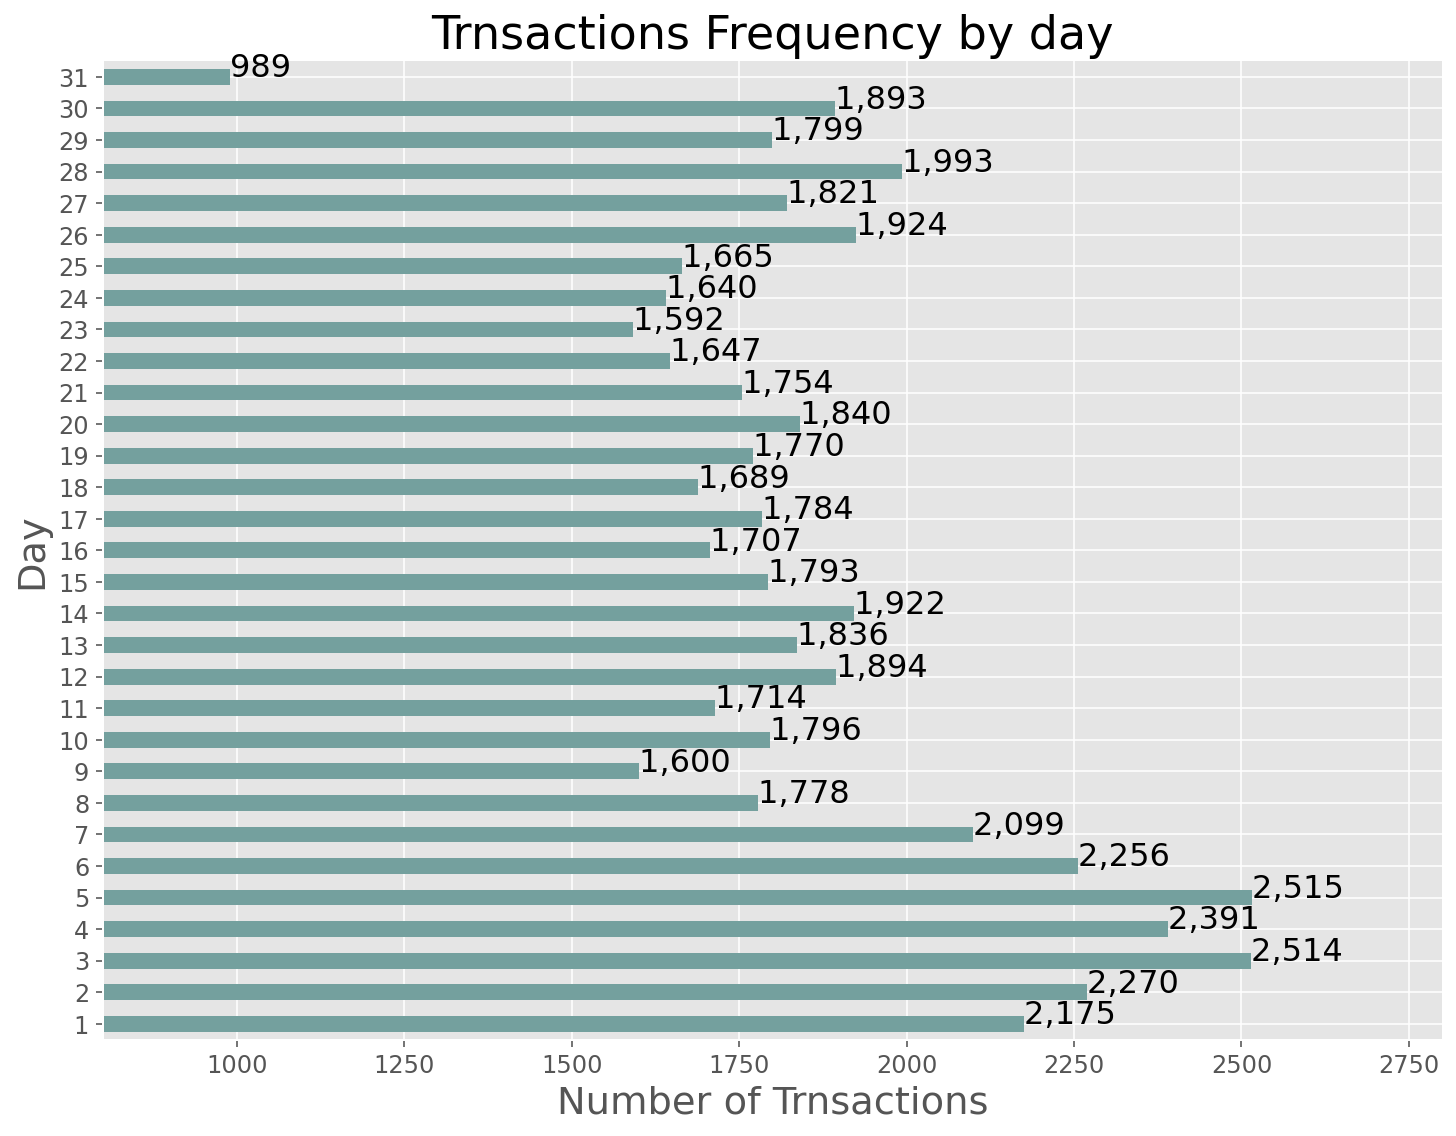

In [26]:
# f, ax = plt.subplots(1,1, figsize=(7, 8));

df_daily_transactions=df_cust.groupby('day')
df_daily_transactions_count = df_daily_transactions.dTicketInternalKey.count()
ax = df_daily_transactions_count.plot.barh()

ax.set_ylabel('Day');
ax.set_xlabel('Number of Trnsactions');
ax.set_title('Trnsactions Frequency by day')
ax.set_xlim(800,2800)

for index,data in enumerate(df_daily_transactions_count):
    ax.text(y=index , x =data , s="{:0,.0f} ".format(data))

Most sales occur at the beginning of each month (3 - 5) first days. The other days of the month will not have a wide difference. Except, at the end of the month, exactly, days 26,28, and 30 of each month. 

###Q10: What are the sales by day?

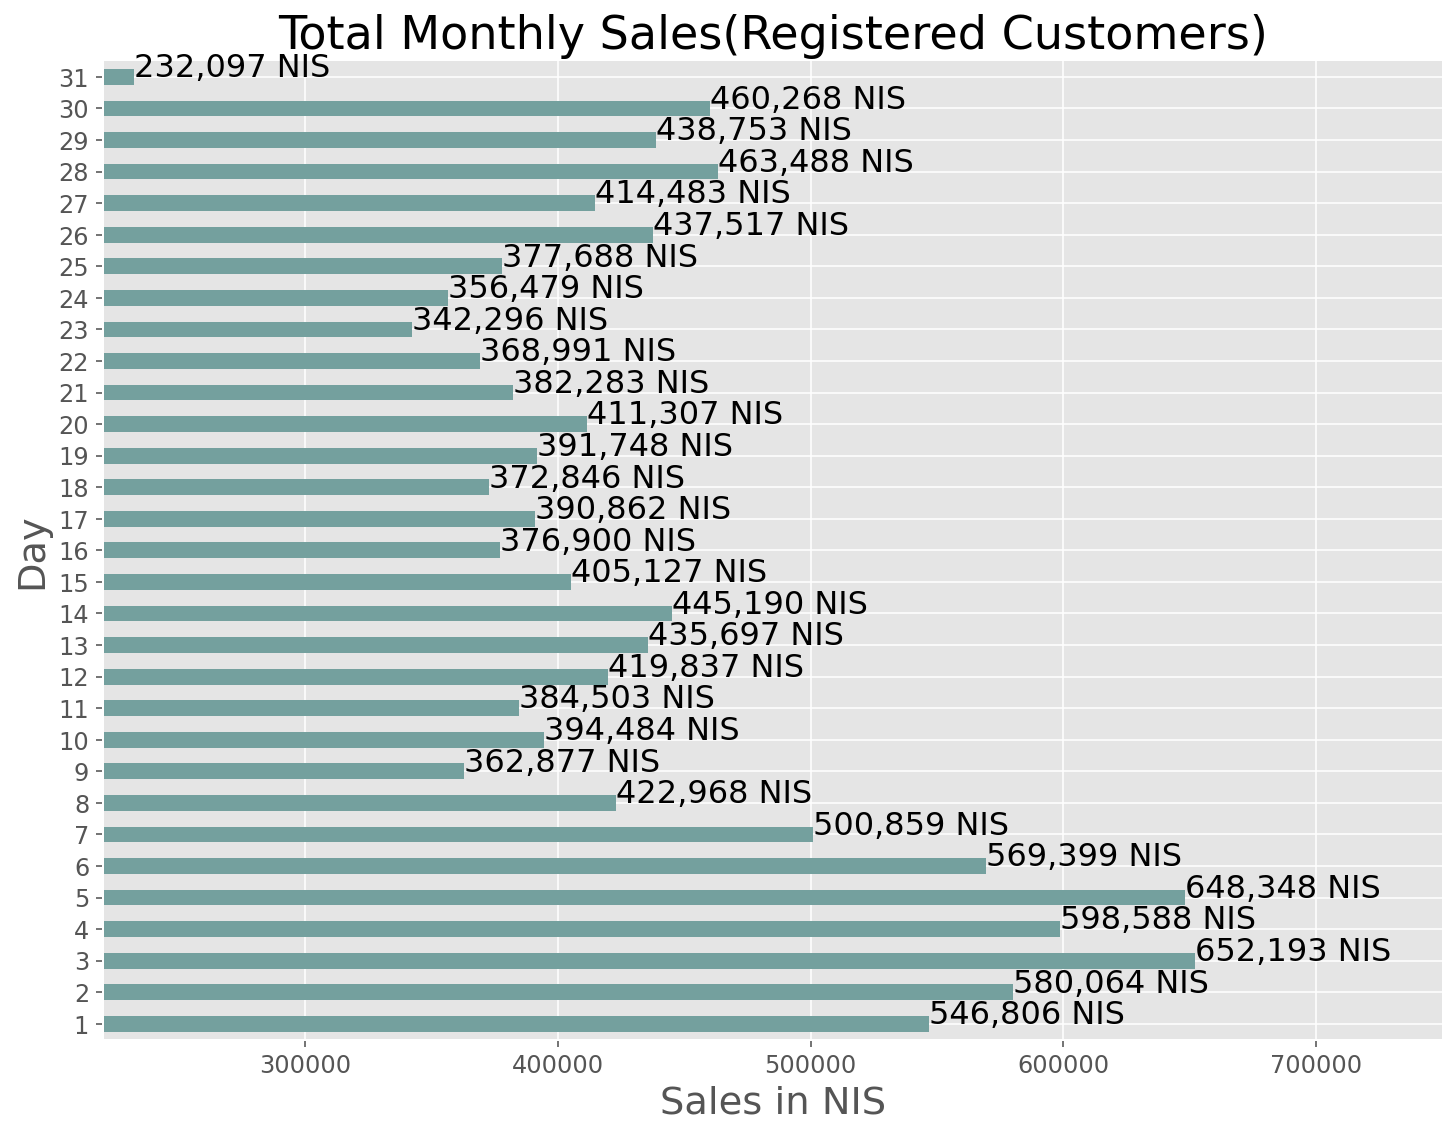

In [27]:
df_customers= df_clean[df_clean.CustomerGroup ==1] # only customers who have Bravo Card.

df_monthly_purchases=uniqueTickets[uniqueTickets.CustomerGroup ==1].groupby(['day'])
df_monthly_purchasesSum = df_monthly_purchases['Total_Net_InvoiceIncVAT'].sum()
ax = df_monthly_purchasesSum.plot.barh()
#ax.set_yticklabels(['Sep/2019','Oct/2019','Nov/2019','Dec/2019'], minor=False)
ax.set_ylabel('Day');
ax.set_xlabel('Sales in NIS');
ax.set_title('Total Monthly Sales(Registered Customers)')
ax.set_xlim(220000,750000)

for index,data in enumerate(df_monthly_purchasesSum):
    ax.text(y=index , x =data , s="{:0,.0f} NIS".format(round(data)))

We also note that the volume of sales, where the highest sales are concentrated in the first days of each month.

###Q11: What are the top 20 best-selling products?

Text(0.5, 1.0, 'Most Ordered Products')

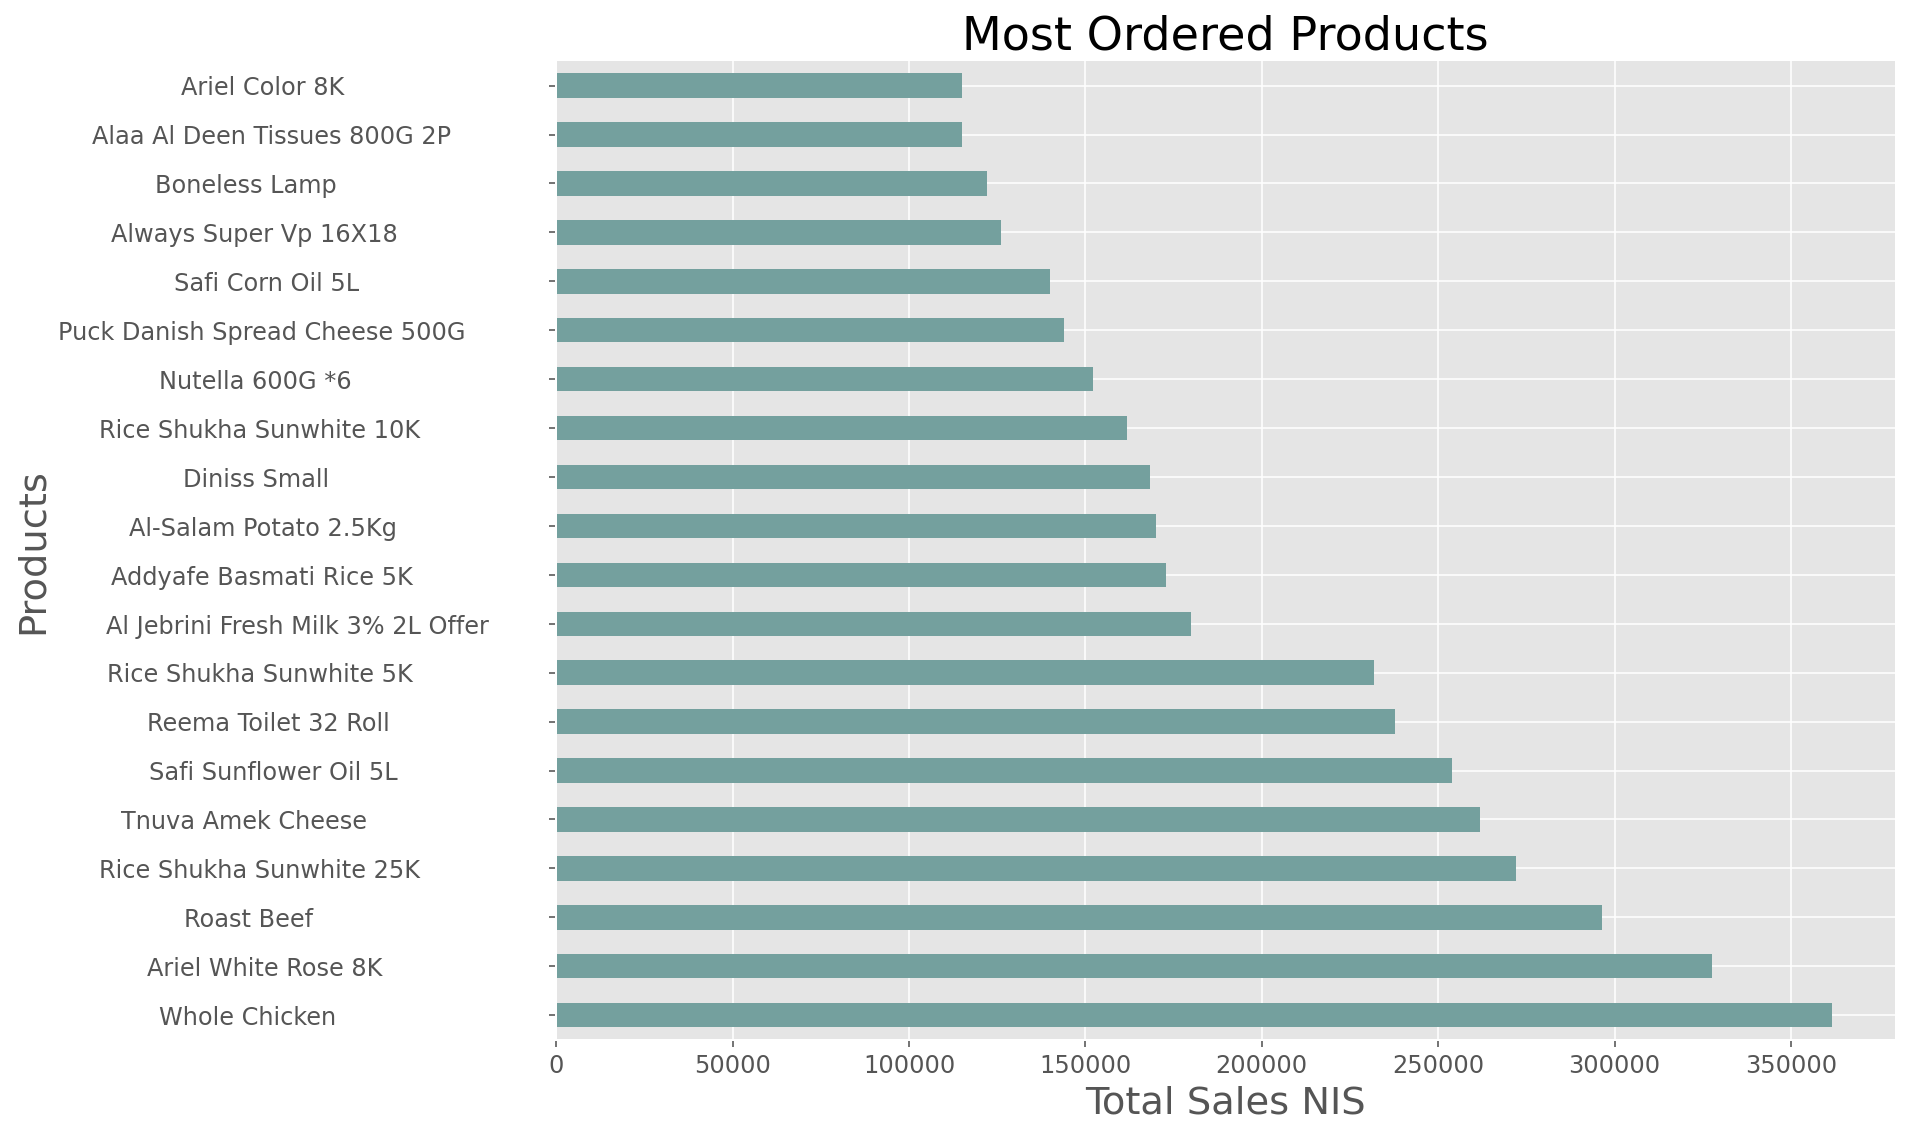

In [28]:

df_items_trsactions= df_clean[['dTicketInternalKey', 'ItemName','NetSales_IncVAT']]
df =df_items_trsactions.groupby('ItemName')
df_sum=df['NetSales_IncVAT'].sum()

ax =df_sum.sort_values().nlargest(20).plot.barh()

ax.set_ylabel('Products');
ax.set_xlabel('Total Sales NIS');
ax.set_title('Most Ordered Products')
#ax.set_xlim(15000,50000)



The top most popular selling products as shown from the figure are Whole Chicken , Arial White Rpse 8K, Rost Beef, Rise Shukha sunwhite 25 kg, etc. While Arial color 8k comes last in the list.

### Q12: What are the min/max of orders recived from top 50 customers?

Text(0.5, 1.0, 'Max/Min Recived from customer')

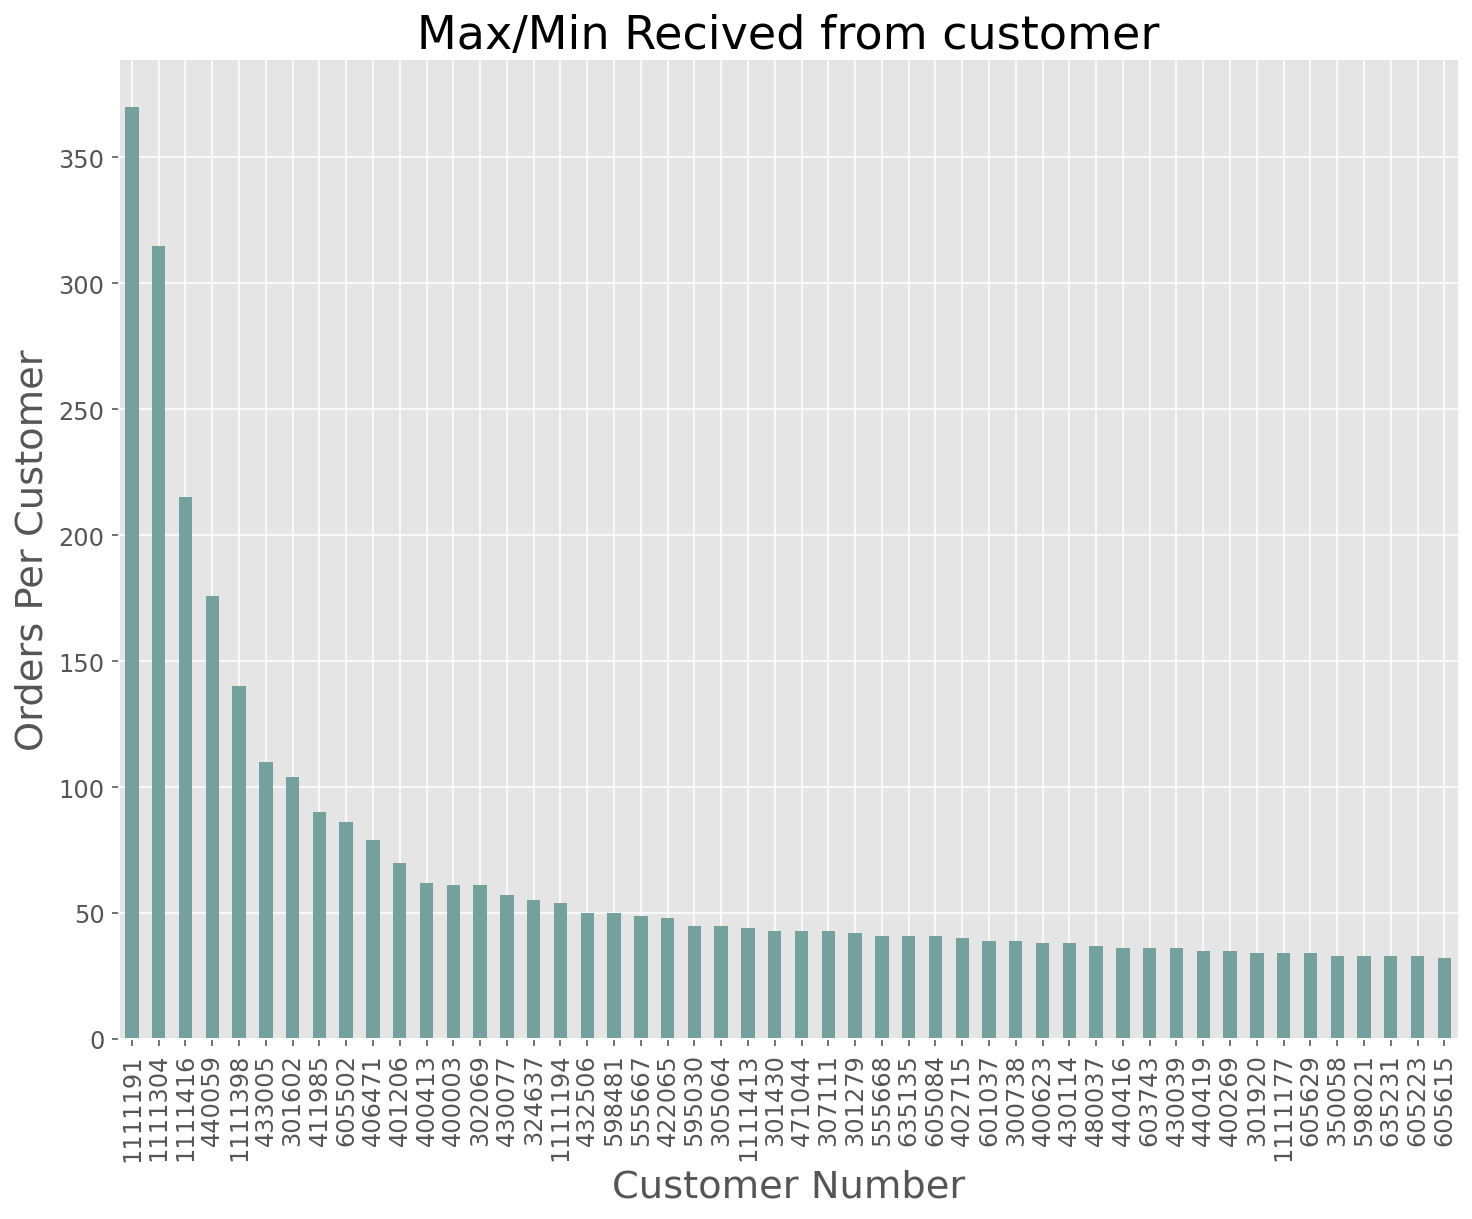

In [64]:

customers_orders =uniqueTickets[uniqueTickets.CustomerGroup==1].CustomerNo
customers_orders_frequemcy = customers_orders.value_counts()
ax= customers_orders_frequemcy.nlargest(50).plot.bar()
ax.set_ylabel('Orders Per Customer');
ax.set_xlabel('Customer Number');
ax.set_title('Max/Min Recived from customer')
#ax.set_xlim(15000,50000)

The image shows the number of orders for each costume, arranged in ascending order to show the highest and lowest-demand.



###Q13: What are the number of products bought per department?

Text(0.5, 1.0, 'Number Of Products bought per department')

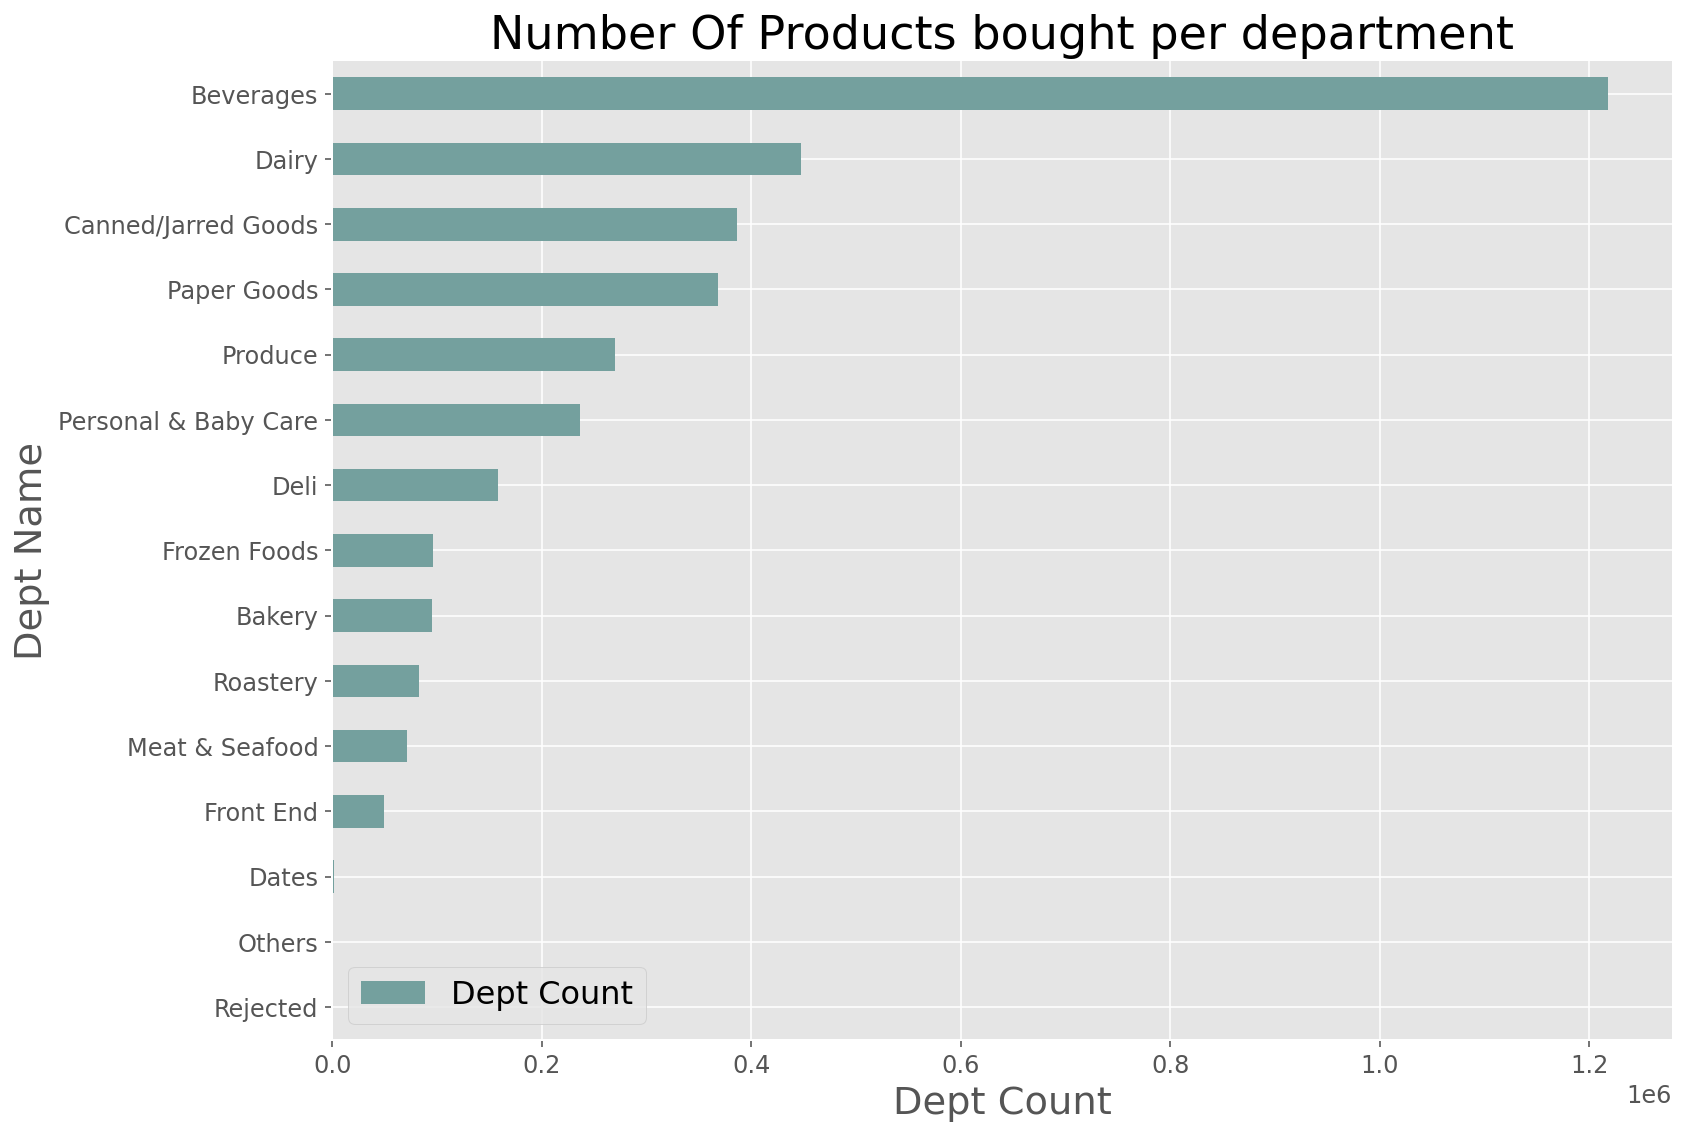

In [30]:
DeptNo=df_items.groupby("DeptNo")
counts=DeptNo.ItemName.count()
depts=['Rejected','Roastery','Produce','Meat & Seafood','Dairy','Deli','Canned/Jarred Goods','Frozen Foods','Bakery','Paper Goods','Personal & Baby Care','Front End','Dates','Beverages','Others']
DFDept=pd.DataFrame({'DeptNo':counts.index.to_list(),'Dept Name':depts,'Dept Count':counts.values})
ax = DFDept.sort_values('Dept Count').plot.barh( x='Dept Name',y='Dept Count')
ax.set_xlabel('Dept Count')
ax.set_title("Number Of Products bought per department")
#ax.legend(loc='center right')

###Q14: What are number of products bought per department per group?

Text(0.5, 1.0, 'Number of products bought per department per group')

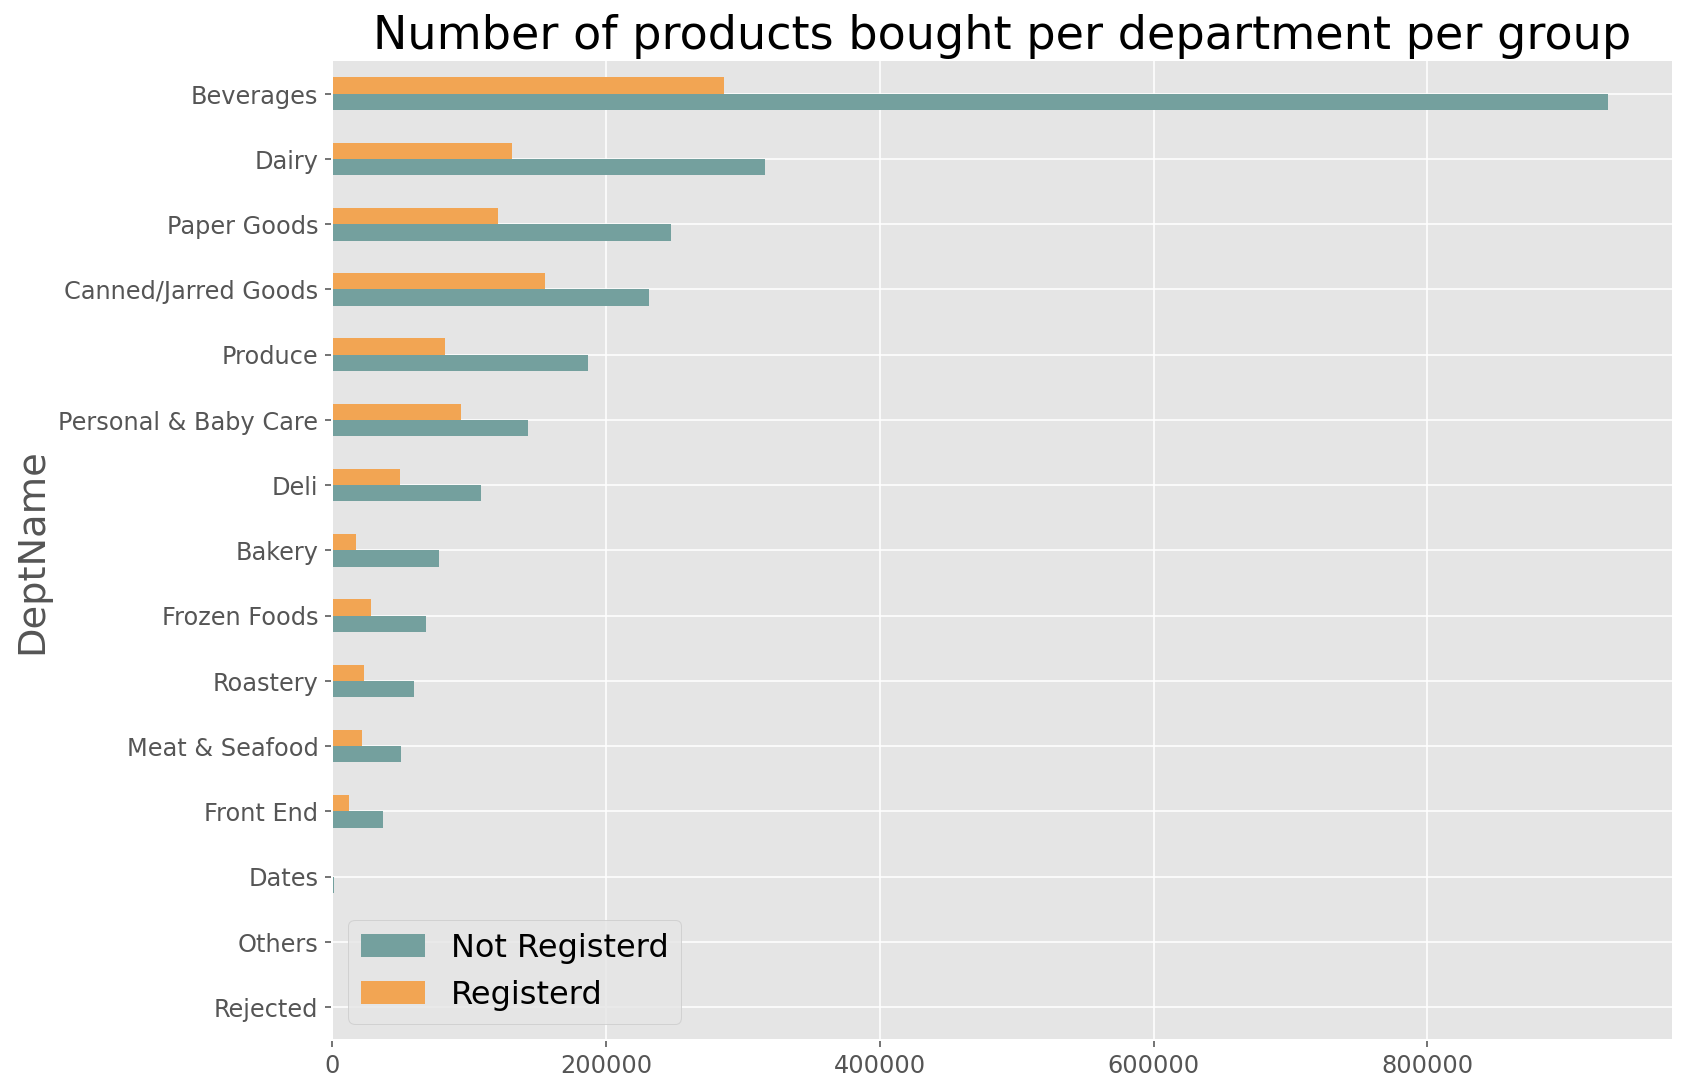

In [31]:
DeptPerGroup=df_items.groupby(["DeptNo","CustomerGroup"])
counts=DeptPerGroup.ItemName.count()

DeptPerGroup = counts.unstack()
DeptPerGroup.columns=['Not Registerd','Registerd']
DeptPerGroup['DeptName']=depts
ax = DeptPerGroup.sort_values(['Not Registerd','Registerd']).plot.barh( x='DeptName')
ax.set_title('Number of products bought per department per group')
#ax.legend(loc='center right')

###Q14: Can we find correlations between departments based on the common products that appear at the same transactions?

In [32]:
data2=df_items[["DeptNo","dTicketInternalKey"]]
dict1=data2.groupby(["DeptNo"]).dTicketInternalKey.apply(list).to_dict()
dict2=data2.groupby(["dTicketInternalKey"]).DeptNo.apply(list).to_dict()


dictNew = {}
dictNewArr={}
dict1keys =dict1.keys()
for item in dict1keys:
  tickts=dict1[item]
  dictItemNew = {}
  arr=[]
  for tic in tickts:
    dictItemNew[tic]=dict2[tic]
    arr+=dict2[tic]
  dictNew[item]=dictItemNew
  dictNewArr[item]=arr


import collections
keys =dictNewArr.keys()
dictNewArrNew={}

for item in keys:
  arr=dictNewArr[item]
  dictNewArrNew[item] = dict(collections.Counter(arr))
  
dictNewArrNew

DeptDF = pd.DataFrame(dictNewArrNew)
DeptDF.sort_index(inplace=True)
DeptDF.columns=depts
DeptDF.index=depts

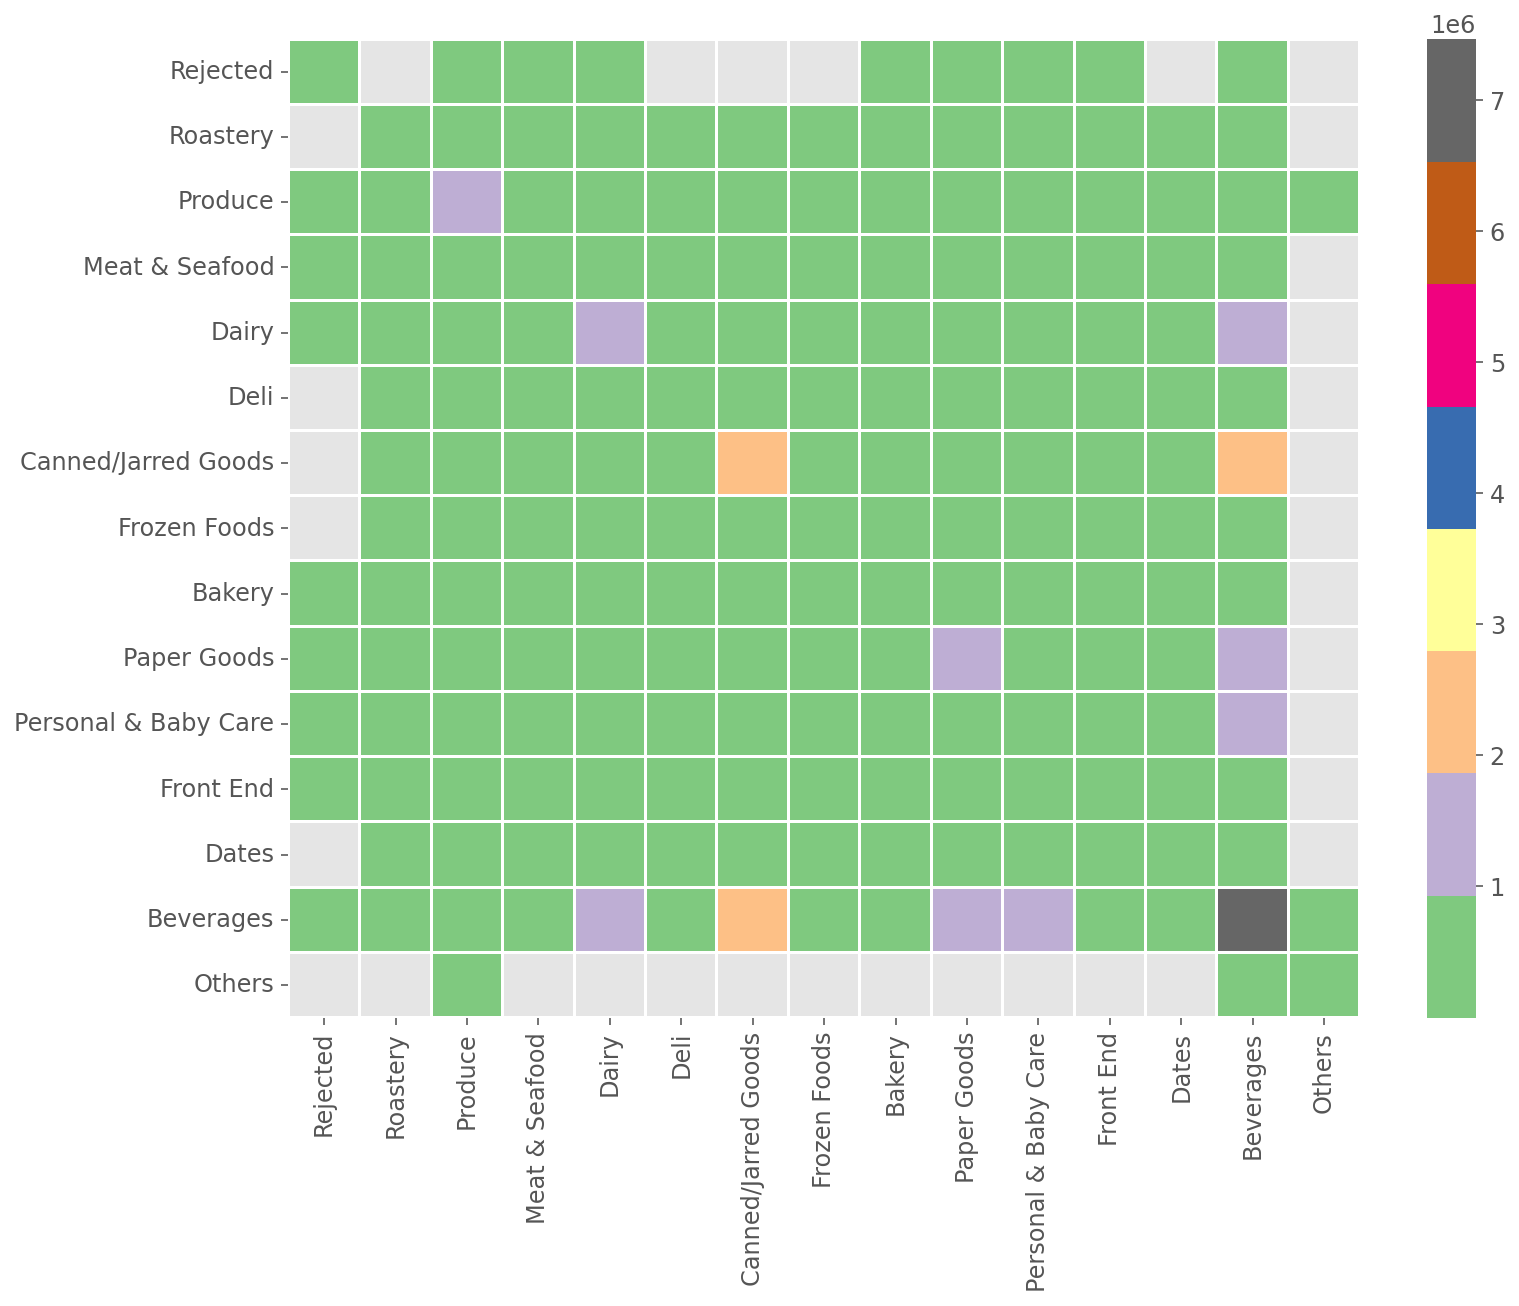

In [33]:
sns.heatmap(DeptDF,linewidths=1,cmap="Accent")

As we see most items bought form **Beverages** ,**Canned/Jarred Goods**, **presonal Care** ,**Paper Goods** and **Dairy** Deparments togther


###Q15: what products are bought together (in the same transaction)


In [34]:
data3=df_items[["dItemInternalKey","dTicketInternalKey"]]
dict3=data3.groupby(["dItemInternalKey"]).dTicketInternalKey.apply(list).to_dict()
dict4=data3.groupby(["dTicketInternalKey"]).dItemInternalKey.apply(list).to_dict()
Items=[]
dictNew1 = {}
dictNewArr1={}
dict1keys =dict3.keys()
for item in dict1keys:
  tickts=dict3[item]
  dictItemNew = {}
  arr=[]
  for tic in tickts:
    dictItemNew[tic]=dict4[tic]
    arr+=dict4[tic]
  dictNew1[item]=dictItemNew
  dictNewArr1[item]=arr

df = df_items[["dItemInternalKey","ItemName"]]

df= df.drop_duplicates("dItemInternalKey")
df=df.set_index("dItemInternalKey")
df = df.sort_index()

keys =dictNewArr1.keys()
dictNewArrNew1={}
  
for item in keys:
  arr=dictNewArr1[item]
  dictNewArrNew1[item] = dict(collections.Counter(arr))
  
dictNewArrNew1
Items = pd.DataFrame(dictNewArrNew1)


In [35]:
col=df.to_dict()
col
df=df.convert_dtypes()
col=df.to_dict()
ItemsWNames=Items
# Items.rename(columns={col['ItemName']})
ItemsWNames.columns=list(col['ItemName'].values())
# Items
ItemsWNames=Items.sort_index()
ItemsWNames.index=list(col['ItemName'].values())
ItemsWNames

,0.5 Nis Item,King kole light red 493 g,King Cole Great Nor 439G,King Cole Butter Beans 439G,King Cole Black Beans 439G,Tabasco 60Ml,Tabasco Hot Sauce 60Ml,Tabasco 60Ml Garlic,Tabasco 60Ml Green Pepper,Pepsi 330Ml,Seven Up Cans 330Ml,Bulgarian Cheese,Maraei Three Cows Cheese Vetta,Maraei Edam Cheese,Tnuva Amek Cheese,Tell Emick,Greek Kashkaval Cheese 1 K,Tnuva Jal Ad Kashkaval Cheese,Italian Parmizan Cheese,Sadfia Cheese 1K,Sin. Al Quds Mort P.O.P,Turkey Breast B.B.Q,Zoglipc Plain&Olives Mort 1K,Mays Mort Olive Soglobek,Sin Roast Beef Plain,Zoglpic Smoked Salami 1K,Zoglpic Turkey Breast 1K,Sin Mort Smoked Turky Squared,Sin Spam Plain W\Pistachio & Olives,Siniora Bbq,Mays Rost Beef Plain,Mays Hodlavan Turkey Breast,Zoglipc Hermon Pasterma,Mays Smoked Turkey Breast Mezra,Mays Italain Salami,Mays Salami Tea Madan,Mays Salami Peproni Regular,Mays Italian Mortadella,Mays Salami Peperoni Dry,Sin Pasterma Grilled & Smoked/Shami,...,Pro Yogurt Pinppl 0% 265Gm,Ice Coffe Strus Classic 230Gm,Click Sheets Chocolate Salted Peanut 85G,Click Sheets Chocolate Crisps 85G,Click Sheets White Chocolate Coconut 85G,Alsalam Sweet Corn 3K,Fuchsia Cheese Puff 65Gm,Fuchsia Chocolate Puff 65Gm,Fuchsia Dates Cupcake 70Gm,Stybel Flour 1K,Alldays Long Plus 44 P,Alldays Normal 58 P,Ariel Lq Touch 2.365 L,Ariel Lq Color2.365 L,Duracell Aa 6+2,Duracell Aaa 6+2,Duracell Ultra Power Aa 4P,Lusine Cupcake Caramel 60G,Lusine Cupcake Strawberry 60G,Lusine Cupcake Chocolate 60G,Lusine Cupcake Vanilla 60G,Farm Weigz Potato 2.5K,Go Nutri Oatmeal Nuts 60G,Galaxy Dark Chocolate Crème 38G,Galaxy Vanilla Crème 38G,Halawa Rahash Halva Mix 500Gm,Caramel Instant Drink 28G,Caramel Instant Drink 28G*20,Cirio Tomato Juice 680Ml,Canada Dry Green Tea Ginger Ale 355Ml,Post Oreo Golden Cereal 311G,Offer Mcvities Digestive 200G*2,Jacobs Intense 3 In 1 17.5G*10,Jacobs Original 3 In 1 17.5G*10,Clorox Clor & Triggers Offer,Toys 10 Nis,Toys 20 Nis,Toys 25 Nis,Toys 15 Nis,Abu Baker 10 Nis
0.5 Nis Item,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
King kole light red 493 g,NaN,623.0,14.0,5.0,81.0,1.0,2.0,1.0,1.0,NaN,NaN,1.0,2.0,5.0,63.0,NaN,NaN,NaN,1.0,1.0,13.0,NaN,NaN,1.0,5.0,NaN,NaN,NaN,1.0,13.0,NaN,15.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
King Cole Great Nor 439G,NaN,14.0,121.0,4.0,17.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
King Cole Butter Beans 439G,NaN,5.0,4.0,26.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
King Cole Black Beans 439G,NaN,81.0,17.0,2.0,433.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,52.0,NaN,NaN,NaN,2.0,1.0,10.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,9.0,NaN,15.0,NaN,2.0,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,